# Quantum Logic Gates

We will need to import NumPy. We will also visualize some of the gate operations in Qiskit by plotting the state vectors on the Bloch sphere so we should also install and import the necessary tools from Qiskit. 

In [1]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

In this section we will discuss a list of the most commonly used [quantum logic gates](https://en.wikipedia.org/wiki/Quantum_logic_gate#Square_root_of_NOT_gate_(%E2%88%9ANOT)) in quantum computing. This will include the Pauli operators, the Hadamard gate, phase gates, controlled-U gates for various unitary operators, swap operators, and the Toffoli gate. 

> "In quantum computing and specifically the quantum circuit model of computation, a quantum logic gate (or simply quantum gate) is a basic quantum circuit operating on a small number of qubits. They are the building blocks of quantum circuits, like classical logic gates are for conventional digital circuits."

> "Unlike many classical logic gates, quantum logic gates are reversible. However, it is possible to perform classical computing using only reversible gates. For example, the reversible Toffoli gate can implement all Boolean functions, often at the cost of having to use ancilla bits. The Toffoli gate has a direct quantum equivalent, showing that quantum circuits can perform all operations performed by classical circuits."

## The Pauli X, Y, and Z gates:

\begin{align}
X = \begin{pmatrix} 0&1 \\ 1&0 \end{pmatrix}, \quad
Y = \begin{pmatrix} 0&i \\ -i&0 \end{pmatrix}, \quad
Z = \begin{pmatrix} 1&0 \\ 0&-1 \end{pmatrix}, \quad
\end{align}

These can also be represented as *outer products*:

\begin{align}
X = |0\rangle \langle 1| + |1\rangle \langle 0| &= \begin{pmatrix} 0&1 \\ 1&0 \end{pmatrix} \\
Y = -i|0\rangle \langle 1| + i|1\rangle \langle 0| &= \begin{pmatrix} 0&i \\ -i&0 \end{pmatrix} \\ 
Z = |0\rangle \langle 0| - |1\rangle \langle 1| &= \begin{pmatrix} 1&0 \\ 0&-1 \end{pmatrix}. 
\end{align}

Sometimes in books, papers, and online sources such as in the documentation for PennyLane, these are denoted by $\sigma_X, \sigma_Y, \sigma_Z$. We can operate on single qubits with the Pauli gates as follows. 

In [3]:
# Define spin-up and spin down
u = np.matrix([[1],
               [0]])

d = np.matrix([[0],
               [1]])

X = np.matrix([[0, 1],
               [1, 0]])

Y = np.matrix([[0, -1j], 
               [1j, 0]])

Z = np.matrix([[1, 0],
               [0, -1]])

Now, let's compute $X|0\rangle$ and $X|1\rangle$. 

In [4]:
X*u

matrix([[0],
        [1]])

In [5]:
X*d

matrix([[1],
        [0]])

As we can see, $X|0\rangle = |1\rangle$ and $X|1\rangle = |0\rangle$. So, the Pauli $X$-gate flips a single qubit in spin-up to spin down, and from spin-down to spin up. This is why the $X$-gate is often referred to as the NOT-gate. We can visualize this in Qiskit as follows. 

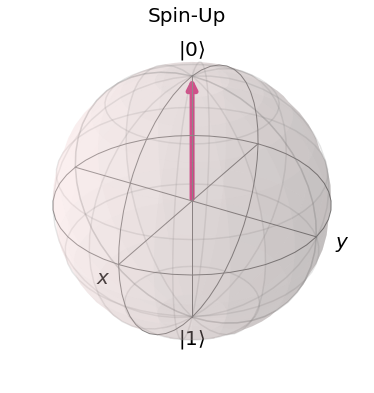

In [6]:
plot_bloch_vector([0,0,1], title="Spin-Up")

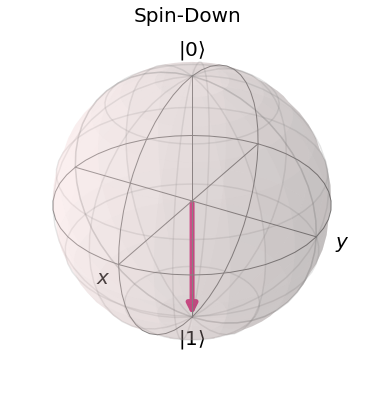

In [7]:
plot_bloch_vector([0,0,-1], title="Spin-Down")

Let's compute $Y|0\rangle$ and $Z|0\rangle$. 

In [8]:
Y*u

matrix([[0.+0.j],
        [0.+1.j]])

In [9]:
Z*u

matrix([[1],
        [0]])

## The Identity Operator and the Hadamard Gate:

\begin{align}
I = \begin{pmatrix} 1&0 \\ 0&1 \end{pmatrix}, \quad
\text{Hadamard Gate:} \ \ H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1&1 \\ 1&-1 \end{pmatrix}
\end{align}

The Hadamard gate is often used to put a single qubit in the spin-up position into a **superposition** of spin-up and spin-down. 

In [10]:
H = (1/np.sqrt(2))*np.matrix([[1, 1], 
                              [1, -1]])

In [11]:
H*u

matrix([[0.70710678],
        [0.70710678]])

## The Phase Gate

\begin{align}
S = 
\begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}
\end{align}

## Controlled-NOT (CNOT or CX)


\begin{align}
CX &= \begin{pmatrix} I & 0 \\ 0 & X \end{pmatrix} = 
\begin{pmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
\end{align}

## Controlled-Z (CZ)

\begin{align}
CZ &= \begin{pmatrix} I & 0 \\ 0 & Z \end{pmatrix} = 
\begin{pmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{pmatrix}
\end{align}

## Controlled-U (CU)

Let $U = \begin{pmatrix} u_{11} & u_{12} \\ u_{21} & u_{22} \end{pmatrix}$ be any unitary matrix operator. Then we have the following gates:

\begin{align}
CU &= \begin{pmatrix} I & 0 \\ 0 & U \end{pmatrix} = 
\begin{pmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{11} & u_{12} \\
0 & 0 & u_{21} & u_{22}
\end{pmatrix}
\end{align}

## Swap

\begin{align}
\mathbf{SWAP} = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 
\end{pmatrix}
\end{align}

## Toffoli Gate

\begin{align}
\mathbf{CCX}
= \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 
\end{pmatrix}
\end{align}

## Exercises

Compute the following tensor products by hand:

1. $CX \otimes H$
2. $H \otimes CZ$
3. $H \otimes S$

Write Python code to compute the tensor products:

4. $CX \otimes H$
5. $H \otimes CZ$
6. $H \otimes S$

Write Python code to compute the basis states as column matrices:

7. $|00 \rangle$
8. $|01 \rangle$
9. $|10 \rangle$
10. $|11 \rangle$

Compute the following using Python code:

11. $(CX \otimes H)|00 \rangle$
12. $(CX \otimes H)|10 \rangle$
13. $(H \otimes CZ)|11 \rangle$
14. $(H \otimes CZ)|01 \rangle$
15. $(H \otimes S)|01 \rangle$

Write Python code for the column matrix basis states:

16. $|001 \rangle$
17. $|101 \rangle$

Write Python code to compute:

17. $CCX|001 \rangle$
18. $CCX|101 \rangle$